# 特征数据预处理-标准化与归一化

## 标准化

同样我们都需要对原始数据进行处理，少不了的就是 **standardization** (或者叫做 **Z-score normalization**) 

要求 均值$ = 0$ 和标准差 $ = 1$ 

$\mu = (x1+x2+....+xn)/n$ 

$\sigma = sqrt(((x1-\mu)**2+(x2-\mu)**2+...+(xi-\mu)**2)/n)$ 

转换公式如下：
\begin{equation} z = \frac{x - \mu}{\sigma}\end{equation} 

这个意义是十分重大的，想象一下，我们经常通过梯度下降来进行优化求解，公式一般如下，如果特征之间的数值差异太大，那么更新的结果肯定也会产生较大的差异，这是我们所不希望的。在最开始的时候，我们认为特征之间的重要程度的是一样，并不想偏袒哪个特征，所以这部预处理工作必做！

$$\Delta w_j = - \eta \frac{\partial J}{\partial w_j} = \eta \sum_i (t^{(i)} - o^{(i)})x^{(i)}_{j},$$

参数更新： 

$$w_j := w_j + \Delta w_j,$$

<a id='About-Min-Max-scaling-normalization'></a>

## 归一化

另一种方法叫做 **Min-Max scaling** (或者叫做 "normalization"也就是我们常说的0-1归一化).  
处理后的所有特征的值都会被压缩到 0到1区间上.这样做还可以抑制离群值对结果的影响.
归一化公式如下：

\begin{equation} X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}} \end{equation}

<br>
<br>

## Standardizing 和 Normalizing的Scikit-learn实现 

The Wine dataset consists of 3 different classes where each row correspond to a particular wine sample.

The class labels (1, 2, 3) are listed in the first column, and the columns 2-14 correspond to 13 different attributes (features):

1) Alcohol  
2) Malic acid  
...

#### Loading the wine dataset

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    'wine_data.csv',  #葡萄酒数据集
     header=None,     #用哪行当做列名，我们自己来指定
     usecols=[0,1,2]  #返回一个子集，我们拿部分特征举例就可以了
    )

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


在数据中，Alcohol和Malic acid 衡量的标准应该是不同的，特征之间数值差异较大



#### Standardization and Min-Max scaling

In [2]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

#### Plotting

In [3]:
%matplotlib inline

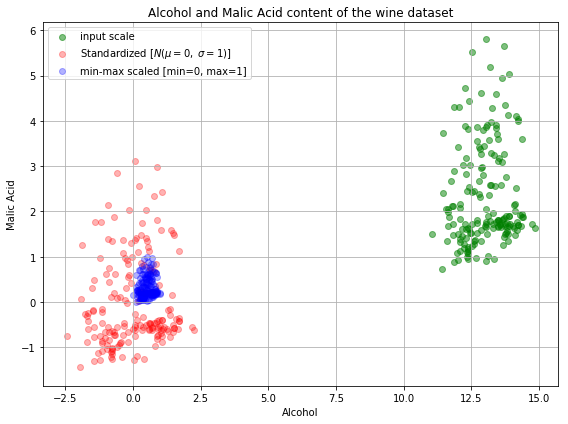

In [4]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'], 
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red', 
            label='Standardized [$N  (\mu=0, \; \sigma=1)$]', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1], 
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()
    
    plt.tight_layout()

plot()
plt.show()

<br>
<br>